In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv('/content/ECommerce_consumer behaviour.csv')
df.head(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter


In [3]:
# Memilih fitur yang akan digunakan untuk clustering
X = df[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered', 'department_id']]

In [5]:
# Mengisi nilai kosong dengan nilai median
for col in X.columns:
    X.loc[:, col].fillna(X[col].median(), inplace=True)

<ipython-input-5-62b4eaa8b7b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col].fillna(X[col].median(), inplace=True)
<ipython-input-5-62b4eaa8b7b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col].fillna(X[col].median(), inplace=True)
<ipython-input-5-62b4eaa8b7b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col].fillna(X[col].median(), inplace=True)
<ipython-input-5-62b4eaa8b7b4>:3: SettingWi

In [6]:
# Menentukan nilai k dengan elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

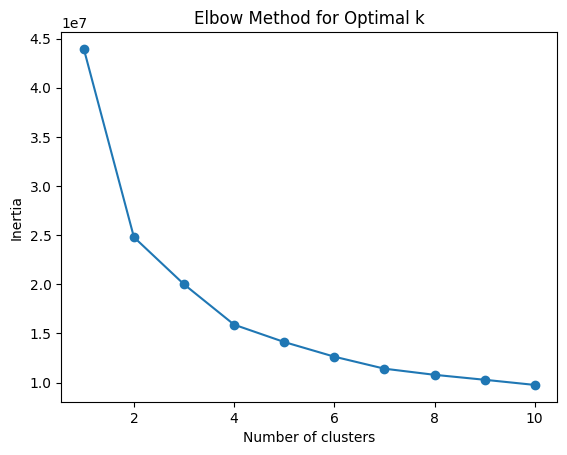

In [7]:
# Memplot elbow plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
# Menentukan nilai k
k = 5  # Asumsikan k = 5 berdasarkan plot inertia

In [9]:
# Membuat objek KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [10]:
# Menambahkan kolom label pada dataset
df['label'] = kmeans.labels_

In [11]:
# Tampilkan beberapa data pertama dari dataset dengan kolom label
print(df.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN          17                  1          0   
1                     NaN          91                  2          0   
2                     NaN          36                  3          0   
3                     NaN          83                  4          0   
4                     NaN          83                  5          0   

   department_id  department        product_name  label  
0             13      pantry  baking ingredients      1  
1             16  dairy eggs     soy lactosefree

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


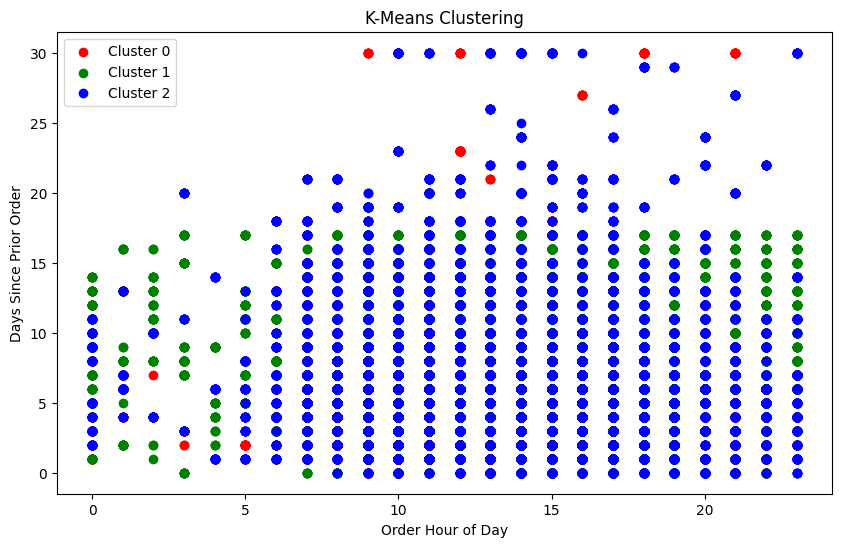

In [12]:
# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Menambahkan kolom label pada dataset
df['label'] = kmeans.labels_

# Plot K-Means
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for label, color in zip(range(k), colors):
    plt.scatter(df[df['label'] == label]['order_hour_of_day'],
                df[df['label'] == label]['days_since_prior_order'],
                c=color, label=f'Cluster {label}')
plt.xlabel('Order Hour of Day')
plt.ylabel('Days Since Prior Order')
plt.title('K-Means Clustering')
plt.legend()
plt.show()